In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from dicom_data_pipeline import data_loader
from dicom_data_segmentation.segmentation import ActiveContourSegmentation


            Doing ActiveContourSegmentation on patient #0
            ###########################################################################################


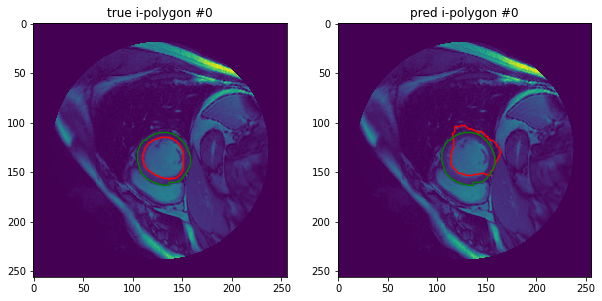

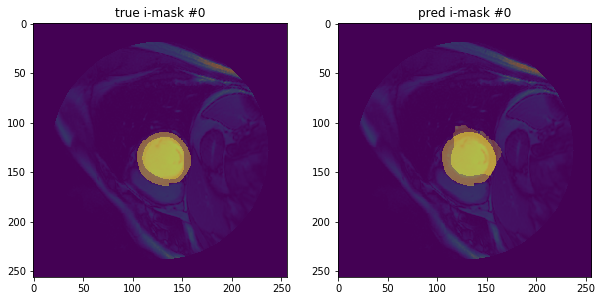


            Patient #0 data segmentation done in 1.52226114273 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #1
            ###########################################################################################


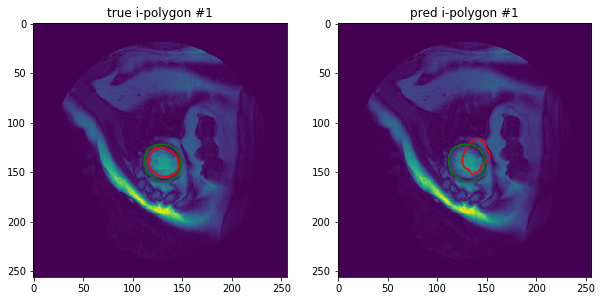

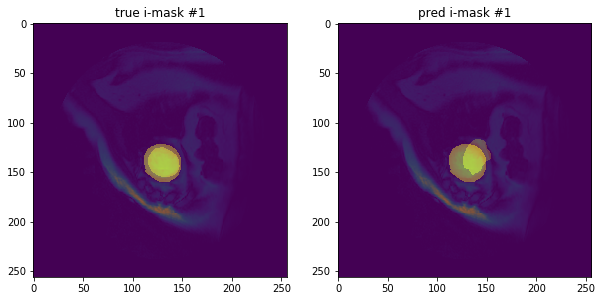


            Patient #1 data segmentation done in 1.19382095337 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #2
            ###########################################################################################


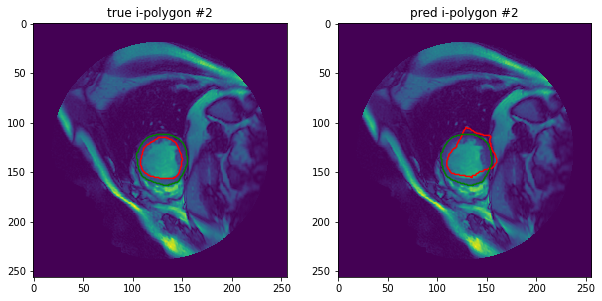

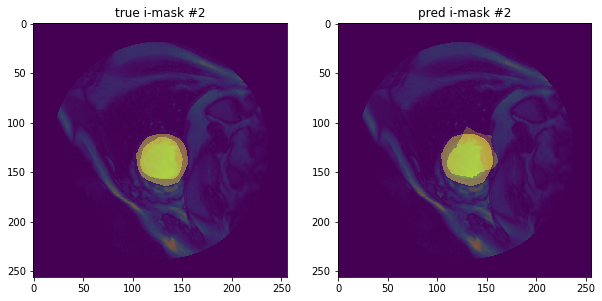


            Patient #2 data segmentation done in 1.87169694901 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #3
            ###########################################################################################


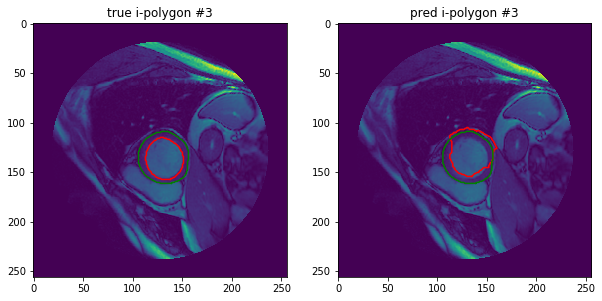

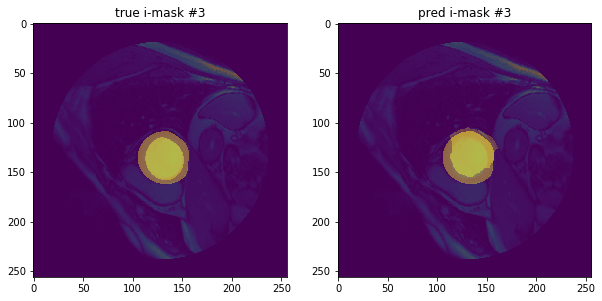


            Patient #3 data segmentation done in 1.59555220604 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #4
            ###########################################################################################


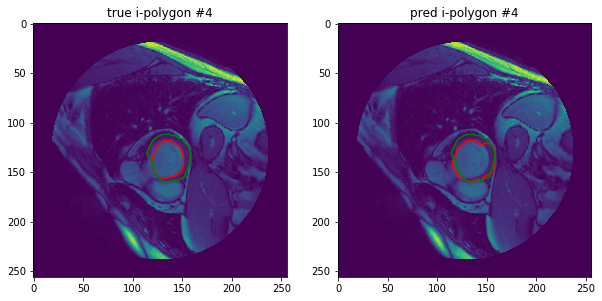

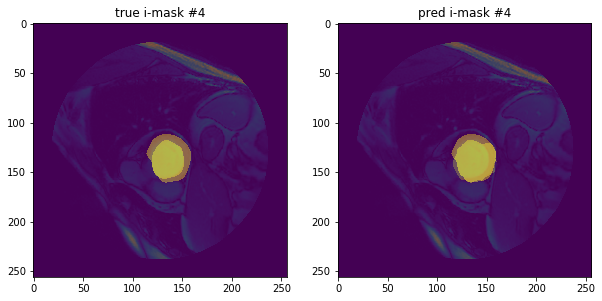


            Patient #4 data segmentation done in 1.24077415466 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #5
            ###########################################################################################


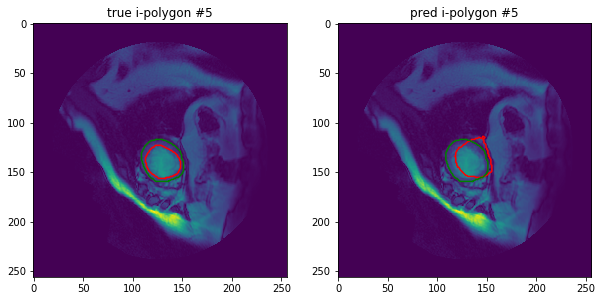

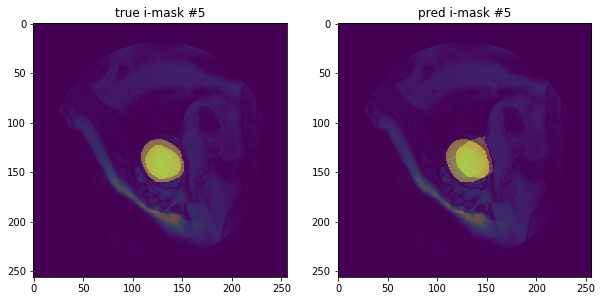


            Patient #5 data segmentation done in 1.37063598633 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #6
            ###########################################################################################


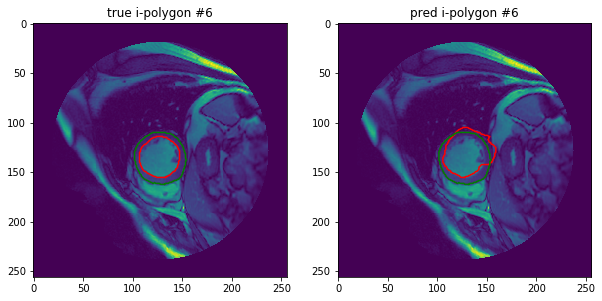

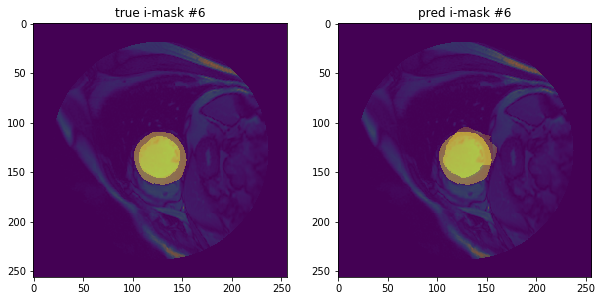


            Patient #6 data segmentation done in 1.27124977112 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #7
            ###########################################################################################


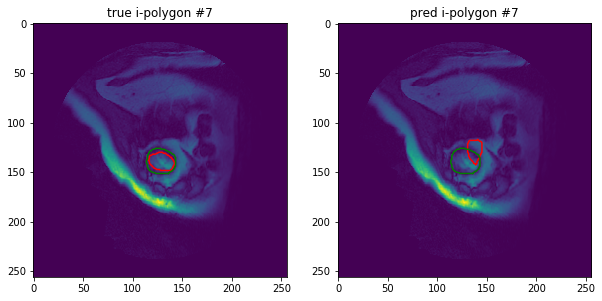

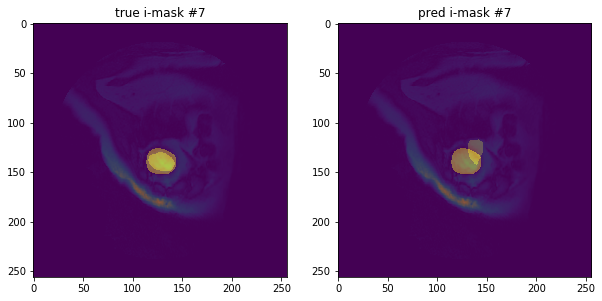


            Patient #7 data segmentation done in 1.57358884811 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #8
            ###########################################################################################


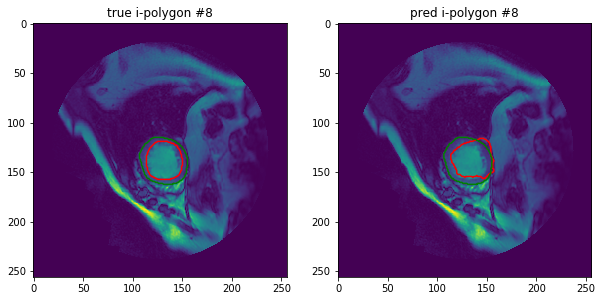

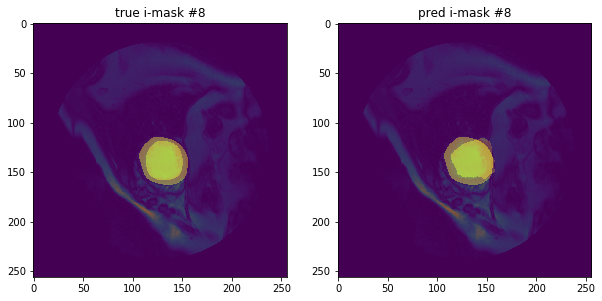


            Patient #8 data segmentation done in 1.32289505005 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #9
            ###########################################################################################


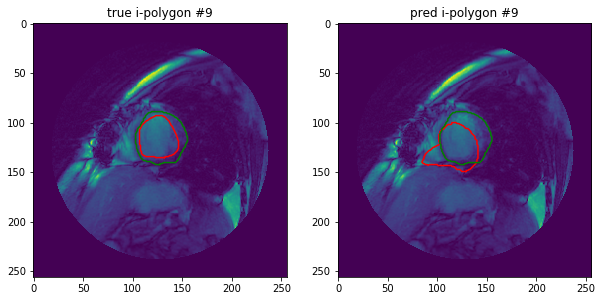

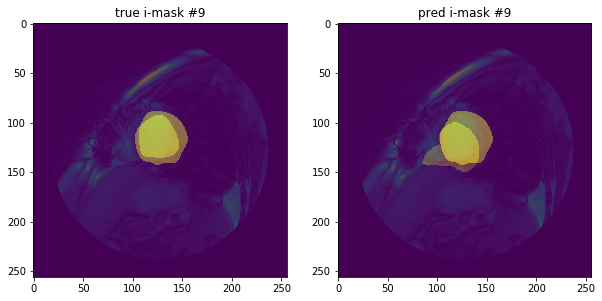


            Patient #9 data segmentation done in 1.42448496819 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #10
            ###########################################################################################


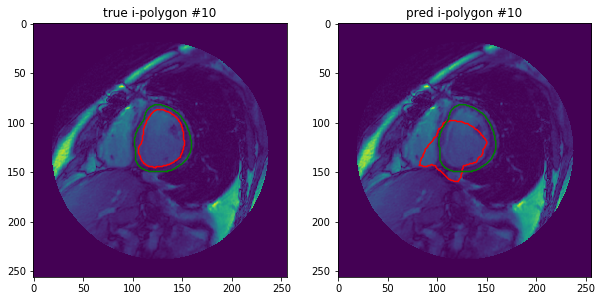

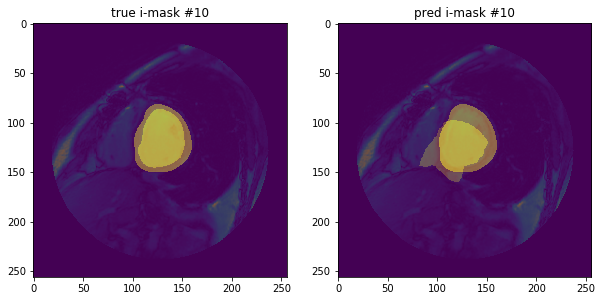


            Patient #10 data segmentation done in 1.57626581192 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #11
            ###########################################################################################

            Patient #11 data segmentation done in 0.495992898941 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #12
            ###########################################################################################

            Patient #12 data segmentation done in 1.18466901779 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #13


            Doing ActiveContourSegmentation on patient #32
            ###########################################################################################

            Patient #32 data segmentation done in 0.667989015579 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #33
            ###########################################################################################

            Patient #33 data segmentation done in 0.640468835831 seconds.
            ###########################################################################################
            
            

            Doing ActiveContourSegmentation on patient #34
            ###########################################################################################

            Patient #34 data segmentation done in 0.486945152283 seconds.
            ###########

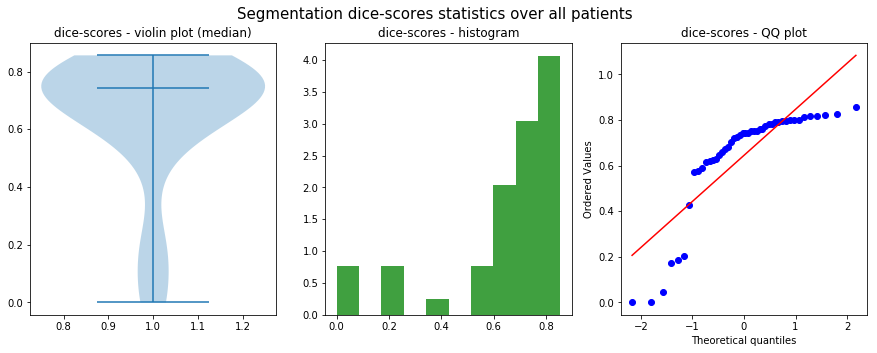

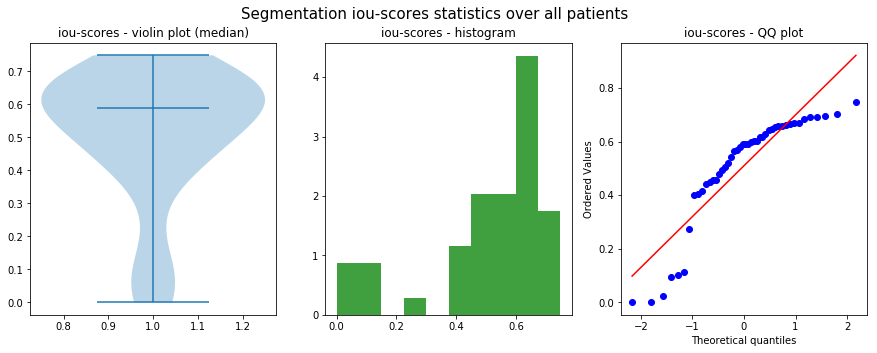

In [2]:
get_data_iterator = lambda : \
    data_loader.DicomMasksDataset(img_masks_filepath='_data/image-masks.i-contours.o-contours.csv')
    
ActiveContourSegmentation(
    data_iterator = get_data_iterator(),
    segmentation_method = ActiveContourSegmentation.__name__,
    plots_prefix = '_plots',
    results_prefix = '_results'
).fit(show_plots=True, max_plots=10)

## Results Analysis:

##  Intro:

- Our goal is to answer the question: Given its "intrinsic suitability" to this task(ie: o-contour -> i-contour) does ActiveContourSegmentation perform better than Thresholds approaches?

- As always, in the following sections we perform both qualitative and quantitative analysis to verify this assumption.


## Segmentation method :   ActiveContourSegmentation

- Before jumping to the analysis, few words on this segmentation method:
- Here no threshold involved, instead we got energy, maths and snakes :) and the wikipedia(https://en.wikipedia.org/wiki/Active_contour_model) article is pretty informative about it.
- The notebook ComparativeAnalysis.ipynb walks you through the comparison of the results obtained with this method to others I've tried.


## Qualitative analysis:

- We can see from the side-by-side plots: ground-thruth i-contour/mask with the predicted i-contour/mask That the segmentation is NOT better(ie: too big pred-i-contours, goes far beyond even the o-contours some times) than with both the Thresholds scheme.(just plotted 10 above to keep the notebook slim, change the parameter max_plots for more)


## Quantitative analysis:

- We have computed the classic dice_coefficient and intersection_over_union metrics on each sample to quantify how good this approach is.
- Using those scores we perform some descriptive statistics on their distribution. And here are the results:
 
     Quantitative Statistics on Scores:
            dice_scores stats :
                DescribeResult(nobs=46, minmax=(0.0, 0.8561643835616438), mean=0.6452654633004901, variance=0.05360904556913851, skewness=-1.7631592898311337, kurtosis=1.9267717310860082)
            dice_scores median :
                0.742163415002
                
                
            Intersection_over_Union_scores stats:
                DescribeResult(nobs=46, minmax=(0.0, 0.7485029940119761), mean=0.5101051753780029, variance=0.04169071407321966, skewness=-1.3663099305797897, kurtosis=0.8127913085418319)
             Intersection_over_Union_scores median :
                0.590031665403
                
- skewness is also negative -> a distribution of scores close to 1.0 as well.
- The median for both scores(dice and IOU) is pretty low in comparison to the Thresholds approaches: 0.74, 0.59 for dice-score and iou-score respectively.
- This numbers are also confirmed by the violin and histogram plots which are fatter in the middles in. Meaning that the correctness of our segmentation has decreased for a non negligeable number of samples.

- What about the QQ-plots?

- Also here, QQ-plots enables us to confirm that the scores distributions aren't Gaussian (since points aren't aligned on the first-diagonal), which will have an impact on which kind of statistics-test to use when comparing different approaches. More in the notebook: ComparativeAnalysis.ipynb




## Conclusion:

- From these analysis, numbers and plots we seem to have an answer to our question: ActiveContourSegmentation is NOT better than Thresholds methods for this problem.

- Now, the question to ask is: Is it due to our choices of parameters, since ActiveContours are known for being fragile to noise and local minima: (perhaps, and that is something worth investigating further doing some hyperparameter search)

- Evidence seems strong that such a difference in scores could NOT be due to 'chance', the notebook: ComparativeAnalysis.ipynb will provides us a CLEAR and IRREFUTABLE answer.